In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
import keras.layers as ml
from PIL import Image
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator as Imgen
from keras.applications.xception import Xception
import pydot
import pydotplus
import graphviz
from keras.utils.vis_utils import plot_model
import os
import json

In [2]:
train_dir = "./Split/train"
val_dir = "./Split/val"
test_dir = "./Split/test"

In [3]:
train_ds = Imgen(rescale=1./255).flow_from_directory(train_dir,
                                                    target_size=(224, 224),
                                                    seed = 1,
                                                     batch_size=10
                                                    )
val_ds = Imgen(rescale=1./255).flow_from_directory(val_dir,
                                                    target_size=(224, 224),
                                                    seed = 1,
                                                     batch_size=10
                                                    )
test_ds = Imgen(rescale=1./255).flow_from_directory(test_dir,
                                                    target_size=(224, 224),
                                                    seed = 1,
                                                     batch_size=10
                                                    )

Found 4078 images belonging to 59 classes.
Found 503 images belonging to 59 classes.
Found 526 images belonging to 59 classes.


In [11]:
base_model = Xception(include_top=False,
                       weights='imagenet',
                       input_shape=(224, 224, 3)
                       )
base_model.trainable = False

In [12]:
model = keras.models.Sequential([
    
    #base_model
    base_model,
    
    ml.GlobalAveragePooling2D(),
    ml.Dense(128,activation='relu'),
    ml.Dropout(0.25),
    ml.Dense(64,activation='relu'),
    ml.Dense(59,activation='softmax')
])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 7, 7, 2048)        20861480  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 128)               262272    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 59)                3835      
                                                        

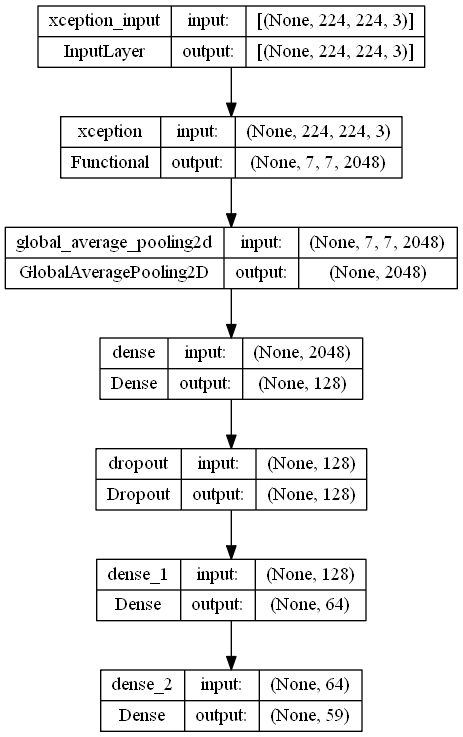

In [14]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [19]:
#compile
model.compile(optimizer='adam',loss=keras.losses.CategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [20]:
#callbacks
my_calls = [tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',patience=3),tf.keras.callbacks.ModelCheckpoint(monitor='val_accuracy',save_best_only=True,mode='max',filepath="./")]

In [21]:
#train
hist = model.fit(train_ds, epochs=10, validation_data=val_ds, callbacks = my_calls)

Epoch 1/10


D:\Anaconda\lib\site-packages\tensorflow\python\util\dispatch.py:1082: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


266/408 [==================>...........] - ETA: 53s - loss: 2.2673 - accuracy: 0.4857

D:\Anaconda\lib\site-packages\PIL\Image.py:945: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


408/408 [==============================] - 178s 425ms/step - loss: 1.8853 - accuracy: 0.5586 - val_loss: 0.9016 - val_accuracy: 0.7396
Epoch 2/10
408/408 [==============================] - 172s 420ms/step - loss: 0.7933 - accuracy: 0.7631 - val_loss: 0.7028 - val_accuracy: 0.7813
Epoch 3/10
408/408 [==============================] - 170s 415ms/step - loss: 0.5534 - accuracy: 0.8239 - val_loss: 0.6029 - val_accuracy: 0.8131
Epoch 4/10
408/408 [==============================] - 176s 431ms/step - loss: 0.4450 - accuracy: 0.8558 - val_loss: 0.5822 - val_accuracy: 0.8171
Epoch 5/10
408/408 [==============================] - 172s 421ms/step - loss: 0.3366 - accuracy: 0.8936 - val_loss: 0.6240 - val_accuracy: 0.8171
Epoch 6/10
408/408 [==============================] - 187s 458ms/step - loss: 0.2900 - accuracy: 0.8987 - val_loss: 0.6117 - val_accuracy: 0.8290
Epoch 7/10
408/408 [==============================] - 177s 433ms/step - loss: 0.2596 - accuracy: 0.9147 - val_loss: 0.5815 - val_accura

In [22]:
#test
model.evaluate(test_ds)

53/53 [==============================] - 21s 387ms/step - loss: 0.7305 - accuracy: 0.8365


[0.730460524559021, 0.8365018963813782]

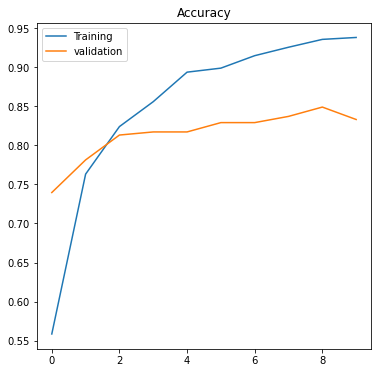

In [23]:
plt.figure(figsize=(6,6))

plt.plot(hist.epoch,hist.history['accuracy'],label = 'Training')
plt.plot(hist.epoch,hist.history['val_accuracy'],label = 'validation')

plt.title("Accuracy")
plt.legend()
plt.show()

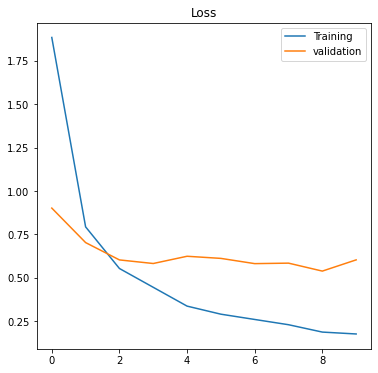

In [24]:
plt.figure(figsize=(6,6))

plt.plot(hist.epoch,hist.history['loss'],label = 'Training')
plt.plot(hist.epoch,hist.history['val_loss'],label = 'validation')

plt.title("Loss")
plt.legend()
plt.show()

In [25]:
x_test,y_test = next(test_ds)
print(x_test.shape,y_test.shape)

(10, 224, 224, 3) (10, 59)


In [26]:
pred_test = model.predict(x_test)
pred_test = [np.argmax(i) for i in pred_test]

1/1 [==============================] - 1s 1s/step


In [27]:
pred_li

['Anggrek Bulan Raksasa',
 'Anggrek Hitam',
 'Anjing Ajag',
 'Anoa',
 'Ayam Cemani',
 'Babi Rusa',
 'Badak Bercula Satu',
 'Badak Sumatera',
 'Banteng',
 'Bekantan',
 'Belalang Kembara',
 'Berang Berang',
 'Beruang Madu',
 'Binturong',
 'Bunga Cendana',
 'Burung Cendrawasih',
 'Burung Hantu Celepuk Jawa',
 'Burung Jalak Bersayap Hitam',
 'Diadem Leaf-Nosed Bat',
 'Edelweiss Jawa',
 'Elang Flores',
 'Elang Jawa',
 'Gajah Asia',
 'Gajah Sumatera',
 'Harimau Sumatera',
 'Jalak Bali',
 'Javan Blue-Banded Kingfisher',
 'Kantong Semar',
 'Katak Merah',
 'Kelinci Sumatera',
 'Kijang Kuning',
 'King Cobra',
 'Komodo',
 'Kucing Kuwuk',
 'Kucing Merah Kalimantan',
 'Kukang Jawa',
 'Kura-Kura Leher Ular Rote',
 'Kuskus Beruang',
 'Kuskus Scham Scham',
 'Landak Jawa',
 'Lutung Merah',
 'Macan Tutul',
 'Maleo',
 'Merak Hijau',
 'Orang Utan',
 'Owa Jawa',
 'Paus Bungkuk',
 'Paus Minke Antartika',
 'Paus Pembunuh',
 'Pesut Mahakam',
 'Pimpinella Pruatjan',
 'Pohon Damar',
 'Rafflesia Arnoldi',
 'Rusa

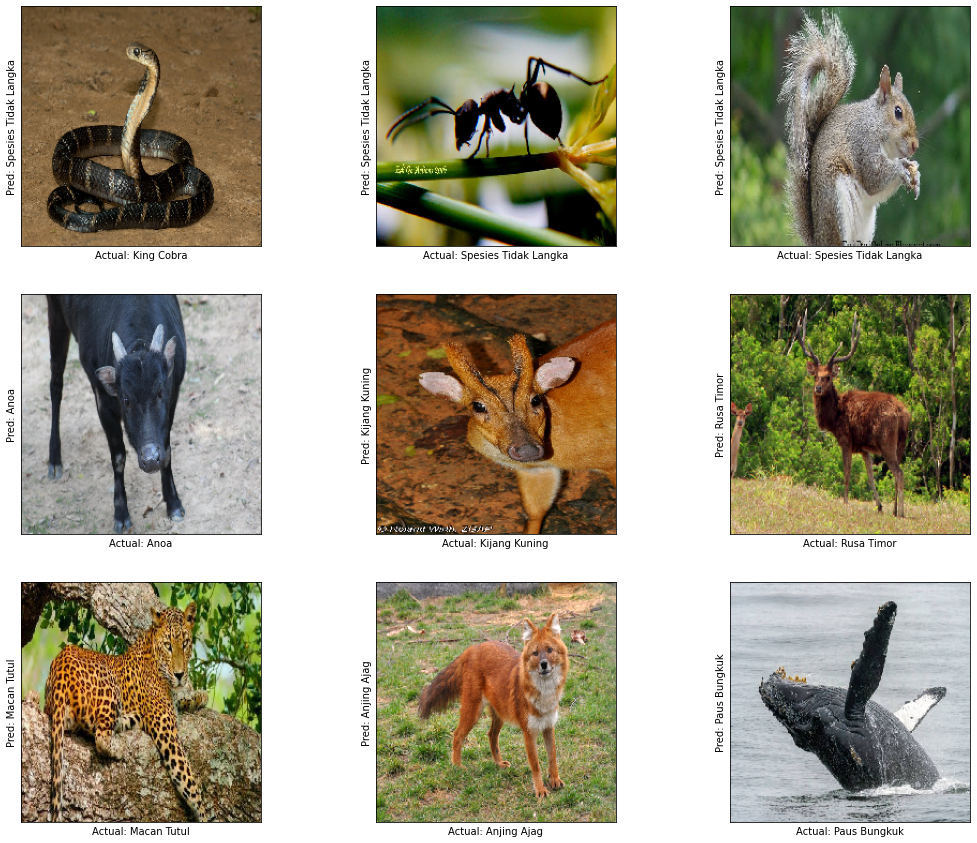

In [28]:
plt.figure(figsize=(18,15))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test[i])
    plt.xlabel("Actual: {}".format(pred_li[np.argmax(y_test[i])]))
    plt.ylabel("Pred: {}".format(pred_li[pred_test[i]]))

In [32]:
model.save("model_baru.h5")

In [31]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

In [35]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open('model_baru_nonq.tflite', 'wb') as f:
    f.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\ADMINI~1\AppData\Local\Temp\tmpaas4jtlg\assets


INFO:tensorflow:Assets written to: C:\Users\ADMINI~1\AppData\Local\Temp\tmpaas4jtlg\assets


In [34]:
converter = tf.compat.v1.lite.TFLiteConverter.from_keras_model_file("model_baru.h5")
converter.post_training_quantize=True
tflite_model = converter.convert()

with open('model_baru.tflite', 'wb') as f:
    f.write(tflite_model)

D:\Anaconda\lib\site-packages\tensorflow\lite\python\lite.py:1892: UserWarning: Property post_training_quantize is deprecated, please use optimizations=[Optimize.DEFAULT] instead.
  warnings.warn("Property %s is deprecated, "


INFO:tensorflow:Assets written to: C:\Users\ADMINI~1\AppData\Local\Temp\tmpp_4eccod\assets


INFO:tensorflow:Assets written to: C:\Users\ADMINI~1\AppData\Local\Temp\tmpp_4eccod\assets


Instructions for updating:
This function will only be available through the v1 compatibility library as tf.compat.v1.saved_model.loader.load or tf.compat.v1.saved_model.load. There will be a new function for importing SavedModels in Tensorflow 2.0.


Instructions for updating:
This function will only be available through the v1 compatibility library as tf.compat.v1.saved_model.loader.load or tf.compat.v1.saved_model.load. There will be a new function for importing SavedModels in Tensorflow 2.0.


INFO:tensorflow:Restoring parameters from C:\Users\ADMINI~1\AppData\Local\Temp\tmpp_4eccod\variables\variables


INFO:tensorflow:Restoring parameters from C:\Users\ADMINI~1\AppData\Local\Temp\tmpp_4eccod\variables\variables


INFO:tensorflow:The given SavedModel MetaGraphDef contains SignatureDefs with the following keys: {'serving_default', '__saved_model_init_op'}


INFO:tensorflow:The given SavedModel MetaGraphDef contains SignatureDefs with the following keys: {'serving_default', '__saved_model_init_op'}


INFO:tensorflow:input tensors info: 


INFO:tensorflow:input tensors info: 


INFO:tensorflow:Tensor's key in saved_model's tensor_map: xception_input


INFO:tensorflow:Tensor's key in saved_model's tensor_map: xception_input


INFO:tensorflow: tensor name: serving_default_xception_input:0, shape: (-1, 224, 224, 3), type: DT_FLOAT


INFO:tensorflow: tensor name: serving_default_xception_input:0, shape: (-1, 224, 224, 3), type: DT_FLOAT


INFO:tensorflow:output tensors info: 


INFO:tensorflow:output tensors info: 


INFO:tensorflow:Tensor's key in saved_model's tensor_map: dense_2


INFO:tensorflow:Tensor's key in saved_model's tensor_map: dense_2


INFO:tensorflow: tensor name: StatefulPartitionedCall:0, shape: (-1, 59), type: DT_FLOAT


INFO:tensorflow: tensor name: StatefulPartitionedCall:0, shape: (-1, 59), type: DT_FLOAT


INFO:tensorflow:Restoring parameters from C:\Users\ADMINI~1\AppData\Local\Temp\tmpp_4eccod\variables\variables


INFO:tensorflow:Restoring parameters from C:\Users\ADMINI~1\AppData\Local\Temp\tmpp_4eccod\variables\variables


Instructions for updating:
Use `tf.compat.v1.graph_util.convert_variables_to_constants`


Instructions for updating:
Use `tf.compat.v1.graph_util.convert_variables_to_constants`


Instructions for updating:
Use `tf.compat.v1.graph_util.extract_sub_graph`


Instructions for updating:
Use `tf.compat.v1.graph_util.extract_sub_graph`
